In [1]:
!pip install gdown

In [2]:
!gdown 1ZFigBqfEDqkqlKlDb_GRaW_1uuHv7tD6

Downloading...
From: https://drive.google.com/uc?id=1ZFigBqfEDqkqlKlDb_GRaW_1uuHv7tD6
To: /content/Copy of FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 122MB/s]


In [3]:
!unzip Copy\ of\ FruitinAmazon.zip

Archive:  Copy of FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmazon/train/

Task 1: Data Understanding and Visualization

Load and Visualize Images from Each Class

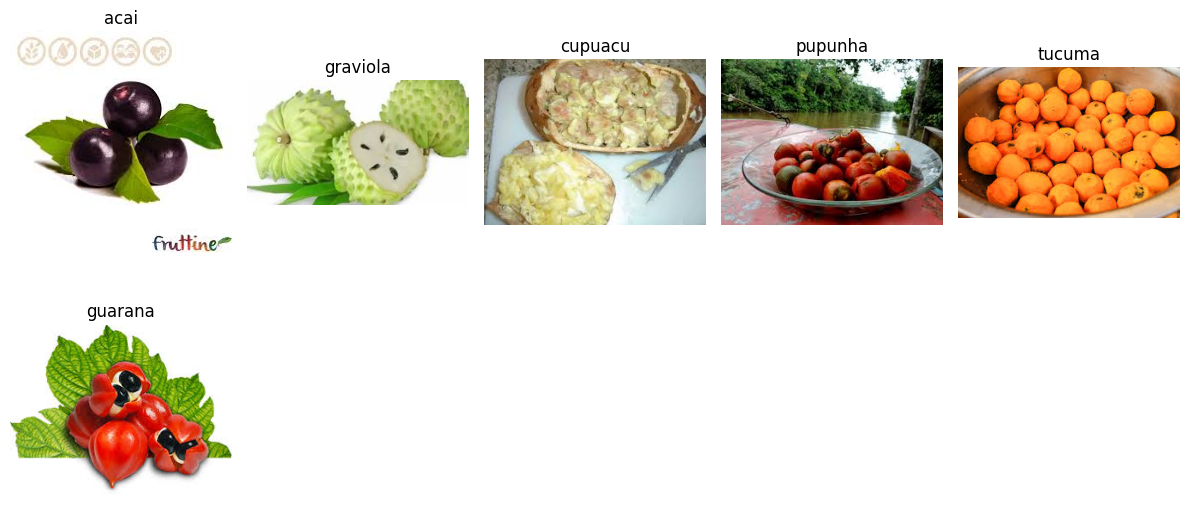

In [4]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Set your dataset path
train_dir = '/content/FruitinAmazon/train'

# Get class names
class_names = os.listdir(train_dir)

# Display random image from each class
plt.figure(figsize=(12, 6))
for i, fruit_class in enumerate(class_names[:10]):  # limit to 10 classes for visual clarity
    class_path = os.path.join(train_dir, fruit_class)
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(fruit_class)
    plt.axis('off')
plt.tight_layout()
plt.show()

This code displays a random sample image from each fruit class in the Amazon Fruit dataset. It helps us visually understand the dataset structure and image quality.

Check and Remove Corrupted Images

In [5]:
from PIL import UnidentifiedImageError

corrupted = []

for fruit_class in os.listdir(train_dir):
    class_path = os.path.join(train_dir, fruit_class)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # verifies integrity
        except (UnidentifiedImageError, IOError, SyntaxError):
            print(f"Removed corrupted image: {img_path}")
            corrupted.append(img_path)
            os.remove(img_path)

if not corrupted:
    print("No corrupted images found.")

No corrupted images found.


Task 2: Loading and Preprocessing Image Data

In [6]:
import tensorflow as tf

img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2
rescale = tf.keras.layers.Rescaling(1./255)

# Load training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

#  Extract class names BEFORE mapping
class_names = raw_train_ds.class_names
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print("Class names:", class_names)

# Then apply rescaling
train_ds = raw_train_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 72 files for training.
Number of classes: 6
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


 Task 3: Build CNN Model

In [7]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Task 4: Compile the Model

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Task 5: Train the Model

In [9]:
# Define validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Apply only rescaling (no augmentation)
rescale = tf.keras.layers.Rescaling(1./255)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.1250 - loss: 2.1578

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 591ms/step - accuracy: 0.1250 - loss: 2.2033 - val_accuracy: 0.1111 - val_loss: 1.9002
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.1551 - loss: 1.9570

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 882ms/step - accuracy: 0.1545 - loss: 1.9680 - val_accuracy: 0.1111 - val_loss: 1.8750
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.1892 - loss: 1.7528

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 492ms/step - accuracy: 0.1940 - loss: 1.7512 - val_accuracy: 0.1111 - val_loss: 1.8158
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.4549 - loss: 1.7033

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - accuracy: 0.4557 - loss: 1.7028 - val_accuracy: 0.0556 - val_loss: 1.7745
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 448ms/step - accuracy: 0.2795 - loss: 1.6457 - val_accuracy: 0.0556 - val_loss: 1.7870
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 517ms/step - accuracy: 0.3828 - loss: 1.5864 - val_accuracy: 0.0556 - val_loss: 1.8514
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 769ms/step - accuracy: 0.4635 - loss: 1.4704 - val_accuracy: 0.1667 - val_loss: 1.7997
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.5133 - loss: 1.3386

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.5239 - loss: 1.3286 - val_accuracy: 0.2778 - val_loss: 1.6947
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.7821 - loss: 1.0424 - val_accuracy: 0.2778 - val_loss: 1.7805
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.7749 - loss: 0.8229

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step - accuracy: 0.7756 - loss: 0.8228 - val_accuracy: 0.2222 - val_loss: 1.5783
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8268 - loss: 0.6813 - val_accuracy: 0.3889 - val_loss: 1.6935
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step - accuracy: 0.9418 - loss: 0.4226 - val_accuracy: 0.2778 - val_loss: 1.9128
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.9115 - loss: 0.3524 - val_accuracy: 0.2778 - val_loss: 1.8504
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - accuracy: 0.9705 - loss: 0.2647 - val_accuracy: 0.3889 - val_loss: 1.6171
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 444ms/step - accuracy: 1.0000 - loss: 0.1396 - val_accuracy: 0.3889 - val_loss: 1.6448
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - accuracy: 0.9813 - loss: 0.0984 - val_accuracy: 0.2222 - val_loss: 2.3495
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.9705 - loss: 0.0643 - val_accuracy: 0.3889 - val_loss:

Task 6: Evaluate the Model

In [11]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.2222 - loss: 1.5783
Test Accuracy: 0.2222, Loss: 1.5783


 Task 7: Save, Load, and Predict

In [12]:
model.save("fruit_model.h5")
loaded_model = tf.keras.models.load_model("fruit_model.h5")

In [13]:
import numpy as np
from sklearn.metrics import classification_report

# Predict
y_pred_probs = loaded_model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = np.concatenate([y for x, y in val_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         1
     cupuacu       0.17      0.50      0.25         2
    graviola       0.00      0.00      0.00         3
     guarana       0.38      0.60      0.46         5
     pupunha       0.50      0.25      0.33         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.28        18
   macro avg       0.17      0.23      0.17        18
weighted avg       0.23      0.28      0.23        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
